In [53]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import math

def load_data(x, y):
    #x will represent the first experiment data MatLab file and y will represent the second experiment data
    v2 = loadmat(x)
    v2_2 = loadmat(y)
    print("Type of file:")
    print(type(v2))
    print()
    print("Dictionary files:")
    print(dict.keys(v2))
    return (v2, v2_2); 

exp1 = 'data/NR-z0131.ezrev4.001.p1.mat'
exp2 = 'data/NR-z0126.ezrev4.002.p1.mat'
v2, v2_2 = load_data(exp1, exp2)


#np.set_printoptions(threshold = 99999999)
np.set_printoptions(threshold=10)

Type of file:
<class 'dict'>

Dictionary files:
dict_keys(['__header__', '__version__', '__globals__', 'matfile', 'fext', 'outpath', 'smoothspikes', 'plxfn', 'chanid', 'unitid', 'psth', 'rnz', 'trialcount', 'freps', 'shortstimlist', 'kHzdata', 'sid', 'ypos', 'xpos', 'r', 'fpath', 'refreshperframe', 'spiketime', 'eyepos', 'droptime', 'phototime', 'stimtime', 'flist', 'h', 's'])


PhotoTime (Stimulus) Array:
4286
[[   1 1825]
 [   1 2891]
 [   1 2925]
 ...
 [  28 7112]
 [  28 7145]
 [  29  713]]

SpikeTime Array:
1060
[[   1 1825]
 [   1 1880]
 [   1 2214]
 ...
 [  28 7201]
 [  28 7231]
 [  29  713]]




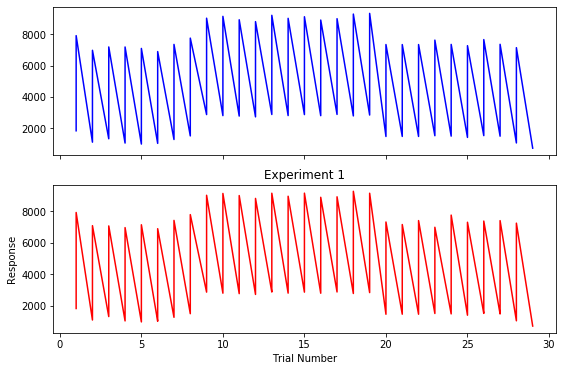

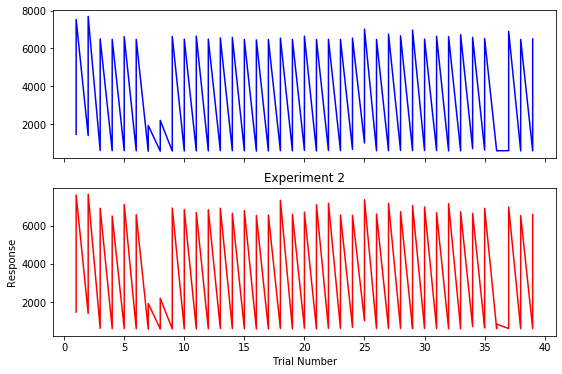

In [2]:
st = v2.get('spiketime')
st_2 = v2_2.get('spiketime')
#print(st[0][0])
#plt.plot(st)

tc = v2.get('trialcount')
tc2 = v2_2.get('trialcount')
#there are 28 trials, use this to relate to other variables in a function

stimt = v2.get('stimtime')
pt = v2.get('phototime')
pt_2 = v2_2.get('phototime')

print("PhotoTime (Stimulus) Array:")
print(len(pt))
#print(pt_2[:, 1])
print(pt)
print()

print("SpikeTime Array:")
print(len(st))
print(st)
print()

#print("Stimtime Array:")
#print(len(stimt))
#print(stimt)
print()

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 6))
plt.xlabel('Trial Number')
plt.ylabel('Response')
plt.title('Experiment 1')
axes[0].plot(pt[:,0],pt[:,1], color='blue')
axes[1].plot(st[:,0],st[:,1], color='red')

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(9, 6))
plt.title('Experiment 2')
plt.xlabel('Trial Number')
plt.ylabel('Response')
axes[0].plot(pt_2[:,0],pt_2[:,1], color='blue')
axes[1].plot(st_2[:,0],st_2[:,1], color='red')

In [117]:
import pandas as pd
pan_pt = pd.DataFrame(pt, columns=["trial", "response"])
pan_pt = pan_pt.set_index(['trial'])

pan_pt2 = pd.DataFrame(pt_2, columns=["trial", "response"])
pan_pt2 = pan_pt2.set_index(['trial'])

pan_st = pd.DataFrame(st, columns=["trial", "response"])
pan_st = pan_st.set_index(['trial'])

pan_st2 = pd.DataFrame(st_2, columns=["trial", "response"])
pan_st2 = pan_st2.set_index(['trial'])

#This section is to calculate statistics within trials
#The for loop used is repeated for both experiment 1 and 2 as the same logic applies
#Only difference was that different variable names had to be used to represent different values when printing

print("Difference in Stimulus and Response Within Trials in Experiment 1")
print("*** where difference = stimulus - response ***")
print()

exp1mean = []
exp1max = []
exp1std = []
exp2mean = []
exp2max = []
exp2std = []

for trial in set(pan_pt.index.values) and set(pan_st.index.values):
    print("Exp1 Trial Number: ", trial)
    pmean = pan_pt.loc[trial].mean().item()
    smean = pan_st.loc[trial].mean().item()
    pmax = pan_pt.loc[trial].max().item()
    smax = pan_st.loc[trial].max().item()
    pstd = pan_pt.loc[trial].std().item()
    sstd = pan_st.loc[trial].std().item()
    dmean = pmean - smean
    dmax = pmax - smax
    dstd = pstd - sstd
    print("Difference in Mean: ", (dmean))
    print("Difference in Max: ", (dmax))
    print("Difference in Standard Deviation: ", (dstd))
    exp1mean.append(dmean)
    exp1max.append(dmax)
    exp1std.append(dstd)
    print()
    
print("****************************************************") 
print("****************************************************")    
print("****************************************************")    

#Start of Experiment 2 (printed stars used to visually seperate data)

print("Difference in Stimulus and Response Within Trials in Experiment 2")
print("*** where difference = stimulus - response ***")
print()

for trial in set(pan_pt2.index.values) and set(pan_st2.index.values):
    print("Exp2 Trial Number: ", trial)
    pmean2 = pan_pt2.loc[trial].mean().item()
    smean2 = pan_st2.loc[trial].mean().item()
    pmax2 = pan_pt2.loc[trial].max().item()
    smax2 = pan_st2.loc[trial].max().item()
    pstd2 = pan_pt2.loc[trial].std().item()
    sstd2 = pan_st2.loc[trial].std().item()
    dmean2 = pmean2 - smean2
    dmax2 = pmax2 - smax2
    dstd2 = pstd2 - sstd2
    print("Difference in Mean: ", dmean2)
    print("Difference in Max: ", dmax2)
    print("Difference in Standard Deviation: ", dstd2)
    exp2mean.append(dmean2)
    exp2max.append(dmax2)
    exp2std.append(dstd2)
    print()
    
print("****************************************************")
print("****************************************************")
print("****************************************************")

#These next two sections represent the statistics that were used to compare data across trials
#Essentially statistics on the 'stimulus' and 'response' data itself
#Because no iteration was required, I was able to print the basic operational functions with no for loops

print("Difference Between Trials in Experiment 1")
print()

print("Total Trial Count: ", tc)
print()

print("Mean Value for Stimulus: ", pt[:, 1].mean())
print("Max Value for Stimulus: ", pt[:, 1].max())
print("Standard Deviation for Stimulus: ", pt[:, 1].std())
print()
print("Mean Value for Neuron Response: ", st[:, 1].mean())
print("Max Value for Neuron Response: ", st[:, 1].max())
print("Standard Deviation for Neuron Response: ", st[:, 1].std())
print()
print("Difference of Means: ", (pt[:, 1].mean())-(st[:, 1].mean()))
print("Difference of Max: ", (pt[:, 1].max())-(st[:, 1].max()))
print("Difference of Standard Deviations: ", (pt[:, 1].std())-(st[:, 1].std()))

print()
print("****************************************************")
print("****************************************************")
print("****************************************************")

print("Difference Between Trials in Experiment 2")
print()

print("Total Trial Count: ", tc2)
print()

print("Mean Value for Stimulus: ", pt_2[:, 1].mean())
print("Max Value for Stimulus: ", pt_2[:, 1].max())
print("Standard Deviation for Stimulus: ", pt_2[:, 1].std())
print()
print("Mean Value for Neuron Response: ", st_2[:, 1].mean())
print("Max Value for Neuron Response: ", st_2[:, 1].max())
print("Standard Deviation for Neuron Response: ", st_2[:, 1].std())
print()
print("Difference of Means: ", (pt_2[:, 1].mean())-(st_2[:, 1].mean()))
print("Difference of Max: ", (pt_2[:, 1].max())-(st_2[:, 1].max()))
print("Difference of Standard Deviations: ", (pt_2[:, 1].std())-(st_2[:, 1].std()))

Difference in Stimulus and Response Within Trials in Experiment 1
*** where difference = stimulus - response ***

Exp1 Trial Number:  1
Difference in Mean:  402.84381408065656
Difference in Max:  8
Difference in Standard Deviation:  -405.8782708901665

Exp1 Trial Number:  2
Difference in Mean:  -28.13952827507819
Difference in Max:  -96
Difference in Standard Deviation:  -312.65234153572214

Exp1 Trial Number:  3
Difference in Mean:  167.58600350709366
Difference in Max:  135
Difference in Standard Deviation:  -163.1895360937583

Exp1 Trial Number:  4
Difference in Mean:  303.2129342965254
Difference in Max:  239
Difference in Standard Deviation:  -87.76344803227198

Exp1 Trial Number:  5
Difference in Mean:  289.48217468805706
Difference in Max:  -33
Difference in Standard Deviation:  -264.4431949050022

Exp1 Trial Number:  6
Difference in Mean:  37.45751633986947
Difference in Max:  15
Difference in Standard Deviation:  -179.4084715860522

Exp1 Trial Number:  7
Difference in Mean:  6

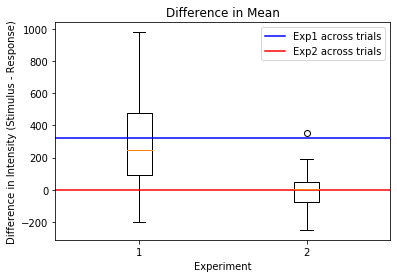

In [118]:
#Setting data variables
data2plot_mean = [exp1mean, exp2mean]
data2plot_max = [exp1max, exp2max]
data2plot_std = [exp1std, exp2std]

#Plotting Mean Boxplot
plt.title("Difference in Mean")
plt.xlabel('Experiment')
plt.ylabel('Difference in Intensity (Stimulus - Response)')
plt.boxplot(data2plot_mean)
plt.axhline((pt[:, 1].mean())-(st[:, 1].mean()), label='Exp1 across trials', color='blue')
plt.axhline((pt_2[:, 1].mean())-(st_2[:, 1].mean()), label='Exp2 across trials', color='red')
plt.legend(loc='upper right')

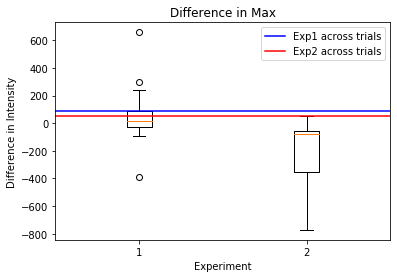

In [114]:
#Plotting Max Boxplot
plt.title("Difference in Max")
plt.xlabel('Experiment')
plt.ylabel('Difference in Intensity')
plt.boxplot(data2plot_max)
plt.axhline((pt[:, 1].max())-(st[:, 1].max()), label='Exp1 across trials', color='blue')
plt.axhline((pt_2[:, 1].max())-(st_2[:, 1].max()), label='Exp2 across trials', color='red')
plt.legend(loc='upper right')

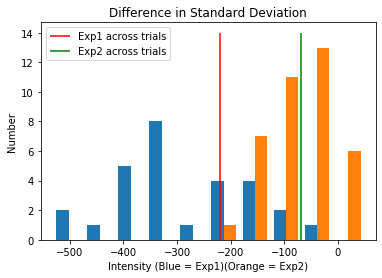

In [120]:
#Ploting Std Boxplot
plt.title("Difference in Standard Deviation")
plt.xlabel('Intensity (Blue = Exp1)(Orange = Exp2)')
plt.ylabel('Number')
plt.hist(cleaned_std, bins = 10)
plt.vlines((pt[:, 1].std())-(st[:, 1].std()), 0, 14, label='Exp1 across trials', color='red')
plt.vlines((pt_2[:, 1].std())-(st_2[:, 1].std()), 0, 14, label='Exp2 across trials', color='green')
plt.legend(loc='upper left')